# Q1
Write a recursive function to compute and return the factorial of a number n.

Factorial calculation using recursive function

In [2]:
def calc_fact(num):    # function to calculate factorial
    if num == 1:
        return num
    else:
        return num * calc_fact(num-1)
    
def Factorial():       # Main function
    num = raw_input("Enter a number: ")
    try:
        num = float(num)
    except ValueError:                     # check if number entered is integer or not
        print "That's not an integer!"
        return Factorial()
    
    while True:
        if (num <=0) or (num != int(num)): # check if the number is a positive integer
            print "Error!, please enter positive integer!"
            return Factorial()
            continue
        else:
            break
            
    a = calc_fact(num)
    return int(a)

In [3]:
Factorial()

Enter a number: -4
Error!, please enter positive integer!
Enter a number: 6


720

# Q2
Given a list of numbers in a random order, write an algorithm that works in 𝑂(𝑛 𝑙𝑜𝑔(𝑛)) to find and return the kth smallest number in the list.
 Your algorithm should be in a function that takes two inputs:
i. someList - a list of numbers
ii. k – kth smallest number
 Your function should make sure that finding kth element is well defined for a given input
list (i.e., if a list has five elements asking for 7th smallest element should return an error).
 Your function should return the kth smallest element

O(nlogn) suggests that the function code is linear logarithmic. We know that, for a list of length n, if the partition occurs in the middle of the list, there will be log(n) divisions. The merge function is linear in atleast the total size of two lists: in the worst case every element must be looked at for the correct ordering. This algorithm matches the description for merge sort. The algorithm for which is as below:

In [6]:
def kthSmallist(test_list, kth):

    def mergeSort(alist):

        if len(alist)>1:
            mid = len(alist)//2
            lefthalf = alist[:mid]
            righthalf = alist[mid:]

            mergeSort(lefthalf)
            mergeSort(righthalf)

            i=0
            j=0
            k=0
            while i < len(lefthalf) and j < len(righthalf):
                if lefthalf[i] < righthalf[j]:
                    alist[k]=lefthalf[i]
                    i=i+1
                else:
                    alist[k]=righthalf[j]
                    j=j+1
                k=k+1

            while i < len(lefthalf):
                alist[k]=lefthalf[i]
                i=i+1
                k=k+1

            while j < len(righthalf):
                alist[k]=righthalf[j]
                j=j+1
                k=k+1
        
        return alist
        
    a = mergeSort(test_list)
    
    return a, a[kth-1]

In [7]:
alist = [54,26,93,17,77,31,44,55,20]
kthSmallist(alist,3)

([17, 20, 26, 31, 44, 54, 55, 77, 93], 26)

# Q3
Compare performance of bubble sort, and np.sort algorithms. Specifically plot the time it takes to sort N randomly generated numbers as a function of N for the three approaches (you will need to create bubble sort function, but can use the np.sort directly from numpy)

In [ ]:
from random import randint
import random
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pylab
%matplotlib inline
import copy
import time

def bubblesort(alist):                            # Bubble sort algorithm
    i = 0
    for i in range(len(alist)-1): 
        for j in range(len(alist)-i-1):
            if (alist[j]>alist[j+1]):
                temp = alist[j+1]
                alist[j+1] = copy.deepcopy(alist[j])
                alist[j] = temp  
    return alist

def numpysort(alist):                             # Numpy sort algorithm
    np_sorted = np.sort(alist)
    return np_sorted

def bubbleTime(initial):                          # Calculating time for Bubble sort
    start_b= time.clock()
    bubblesort(initial)
    end_b = time.clock()
    b_time = end_b - start_b
    return b_time

def numpyTime(initial):                           # Calculating time for Numpy sort
    start_n = time.clock()
    numpysort(initial)
    end_n = time.clock()
    n_time = end_n - start_n
    return n_time

b=[]
n=[]
N = input ("Enter sample size to be tested: ")
for i in range(N):
    #N = 200
    initial = []
    s = random.sample(range(N),i)                 # Generate random values for each value from 1 to N
    t= bubbleTime(s)
    p= numpyTime(s)
    b.append(t)                                   # Bubble time values
    n.append(p)                                   # Numpy time values
    
# Plot the Comparison chart
    
sns.set_style("whitegrid")
x = range(N)
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x,b, label = "Bubble plot", color = "blue")
ax.plot(x,n, label = "np.sort plot", color = "red")
ax.set_title("Performance Comparison: Bubble sort vs Numpy sort", fontsize = 15)
plt.legend(loc="upper left")
plt.show()   

Enter sample size to be tested: 1000


The plot values show, numpy sort has very low time than bubble sort

# Q4
In Blackjack, the dealer must take cards according to the following set of rules:
i. Take cards until the sum is at least 17
ii. If the hand contains an ace, then
 Ace will be counted as 11 when that results in a total between 17 and 21 (inclusive) and Ace will be counted as 1 otherwise. [For example: ‘A6’-> 17, ‘88A’->17, ‘8A’->19]
Dealer busts if he goes over 21.
Card values: All face cars count as 10, all numeric cars count as their numeric value. Ace is counted as 1 or 11.
Dealer starts out with one card showing. Write a program to estimate dealer’s bust probability for each possible starting card value. In other words, your program has to run multiple simulations for each possible starting value (Ace-10). Output results as a bar plot with card values on the x- axis and probability of dealer going bust on the y-axis.

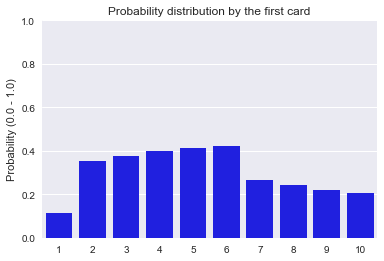

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pylab
%matplotlib inline
deck = [1,2,3,4,5,6,7,8,9,10,10,10,10]

def FindDealerProbGraph(first_card, iteration):
    
    burst = 0
    
    for i in range(int(iteration)):

    
        dealer_card = []
        dealer_card.append(int(first_card))
        dealer_sum = sum(dealer_card)
    
        while dealer_sum < 17:
        
            next_card = np.random.choice(deck)
            dealer_card.append(next_card)
            dealer_sum = dealer_sum + next_card
            if (dealer_sum >= 7) and (dealer_sum <=11):
                if 1 in dealer_card:
                    dealer_sum = dealer_sum + 10
            if dealer_sum > 21:
                burst = burst + 1
 
    return (float(burst) / len(range(int(iteration))))

first_card = range(11)[1:11]
prob_list = []

for i in first_card:
    
    prob = FindDealerProbGraph(i, 10000)
    prob_list.append(prob)

fig,ax = plt.subplots()

sns.barplot(x=first_card, y=prob_list, color = "blue")
ax.set_ylim(0,1)
ax.set_title("Probability distribution by the first card")
ax.set_ylabel("Probability (0.0 - 1.0)")

The graph shows that the chance of dealer going bust is highest when the first card is 6 and lowest when the first card is A. There is a clear trend.